# Freeze Location Tracking


In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from mfreeze.oop_interface import FreezeDetector
import warnings

In [2]:
class MouseData:
    session_names = [
        "D1Morning", "D1Afternoon", "D2Morning", "D2Afternoon", "D3", "D4"
    ]
    
    def __init__(self, home_dir, video_suffix="avi"):
        self.home_dir = Path(home_dir)
        self.video_suffix = video_suffix
        self.video_paths = self._get_video_paths()
        
    def _get_video_paths(self):
        "Return dict with session names as keys and dict values with sub keys 'input_dir' and 'output_dir'"
        out = {}
        for session_name in MouseData.session_names:
            session_videos = [*(self.home_dir / session_name / "raw_bonsai_data").glob(f"*.{self.video_suffix}")]
            if len(session_videos) != 1:
                warnings.warn(f"More than one behavioural video present {session_videos}")
            output_dir = self.home_dir / session_name / "behaviour_analysis"
            output_dir.mkdir(exist_ok=True)
            out[session_name] = {"input_dir": str(session_videos[0]), "output_dir": str(output_dir)}
        return out
        

In [3]:
p = "E:\Context_switch_output\pilot\data\proper\B46837"
mouseID = Path(p).name
m = MouseData(p)

## Day 1 Morning

In [23]:
session_name = "D1Morning"

freeze_threshold = 30
start_frame=0

In [24]:
detector = FreezeDetector(
    video_path=m.video_paths[session_name]["input_dir"], 
    save_video_dir=m.video_paths[session_name]["output_dir"],
    freeze_threshold=freeze_threshold, 
    start_frame=start_frame,
    med_filter_size=5,
    compression_factor=3
)
detector.detect_motion()

array([5608., 5608., 5608., ...,  311.,  311.,  308.])

C:\Users\rory\.conda\envs\context\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


[Text(-5000.0, 0, '-2.78'),
 Text(0.0, 0, '0.0'),
 Text(5000.0, 0, '2.78'),
 Text(10000.0, 0, '5.56'),
 Text(15000.0, 0, '8.33'),
 Text(20000.0, 0, '11.11'),
 Text(25000.0, 0, '13.89')]

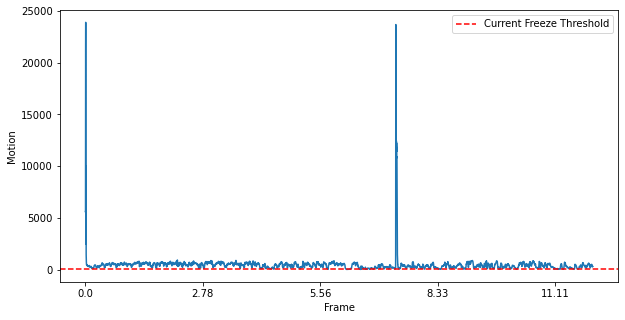

In [25]:
freeze_threshold = 30
detector.freeze_threshold = freeze_threshold

ax = detector.plot_motion()
ax.set_xticklabels(np.round(ax.get_xticks() / (30 * 60), 2) )
# ax.set_ylim([0, 158000])

In [26]:
# set new threshold based on the plot, if need be
detector.detect_freezes(freeze_threshold=freeze_threshold)
detector.save_video()

<FreezeDetector: B46837_1_14_2021_morn1_context_one_video.avi>

In [27]:
(
    detector.generate_report()
    .assign(
        session_name=session_name,
        mouseID=mouseID 
    )
    .to_csv(
        Path(m.video_paths[session_name]["output_dir"]) / "freeze_ts.csv", 
        index=False
    )
)

## D1 Afternoon

In [15]:
session_name = "D1Afternoon"

freeze_threshold = 30
start_frame=0

In [16]:
detector = FreezeDetector(
    video_path=m.video_paths[session_name]["input_dir"], 
    save_video_dir=m.video_paths[session_name]["output_dir"],
    freeze_threshold=freeze_threshold, 
    start_frame=start_frame,
    med_filter_size=5,
    compression_factor=3
)
detector.detect_motion()

array([296., 976., 976., ..., 598., 576., 545.])

C:\Users\rory\.conda\envs\context\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


(0.0, 5000.0)

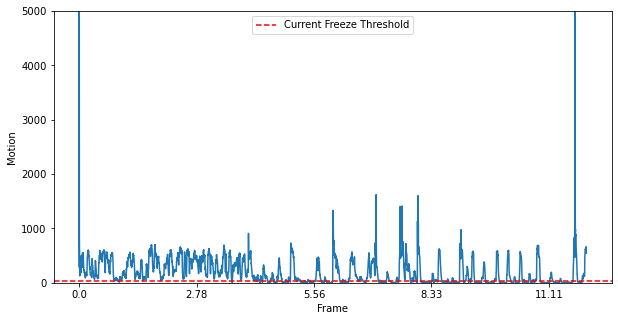

In [19]:
freeze_threshold = 30
detector.freeze_threshold = freeze_threshold
ax = detector.plot_motion()
ax.set_xticklabels(np.round(ax.get_xticks() / (30 * 60), 2))
ax.set_ylim([0, 5000])

In [20]:
detector.detect_freezes(freeze_threshold=freeze_threshold)
detector.save_video()

<FreezeDetector: B46837_1_14_2021_noon1_condition_two_video.avi>

In [21]:
(
    detector.generate_report()
    .assign(
        session_name=session_name,
        mouseID=mouseID 
    )
    .to_csv(
        Path(m.video_paths[session_name]["output_dir"]) / "freeze_ts.csv", 
        index=False
    )
)

## D2Morning

In [28]:
session_name = "D2Morning"

freeze_threshold = 30
start_frame=0

In [29]:
detector = FreezeDetector(
    video_path=m.video_paths[session_name]["input_dir"], 
    save_video_dir=m.video_paths[session_name]["output_dir"],
    freeze_threshold=freeze_threshold, 
    start_frame=start_frame,
    med_filter_size=5,
    compression_factor=3
)
detector.detect_motion()

array([5717., 5717., 5717., ...,   75.,   75.,   75.])

C:\Users\rory\.conda\envs\context\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


[Text(-5000.0, 0, '-2.78'),
 Text(0.0, 0, '0.0'),
 Text(5000.0, 0, '2.78'),
 Text(10000.0, 0, '5.56'),
 Text(15000.0, 0, '8.33'),
 Text(20000.0, 0, '11.11'),
 Text(25000.0, 0, '13.89')]

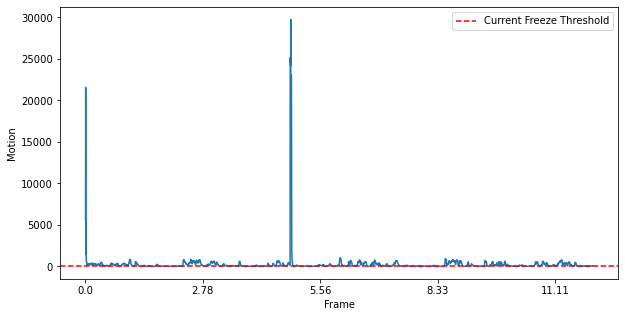

In [30]:
freeze_threshold = 30
detector.freeze_threshold = freeze_threshold
ax = detector.plot_motion()
ax.set_xticklabels(np.round(ax.get_xticks() / (30 * 60), 2))
# ax.set_ylim([0, 5000])

In [31]:
detector.detect_freezes(freeze_threshold=freeze_threshold)
detector.save_video()

<FreezeDetector: B46837_1_15_2021_morn2_context_one_video.avi>

In [32]:
(
    detector.generate_report()
    .assign(
        session_name=session_name,
        mouseID=mouseID 
    )
    .to_csv(
        Path(m.video_paths[session_name]["output_dir"]) / "freeze_ts.csv", 
        index=False
    )
)

## D2Afternoon

In [33]:
session_name = "D2Afternoon"

freeze_threshold = 30
start_frame=0

In [34]:
detector = FreezeDetector(
    video_path=m.video_paths[session_name]["input_dir"], 
    save_video_dir=m.video_paths[session_name]["output_dir"],
    freeze_threshold=freeze_threshold, 
    start_frame=start_frame,
    med_filter_size=5,
        compression_factor=3
)
detector.detect_motion()

array([16., 16., 16., ...,  3.,  3.,  3.])

C:\Users\rory\.conda\envs\context\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


(0.0, 5000.0)

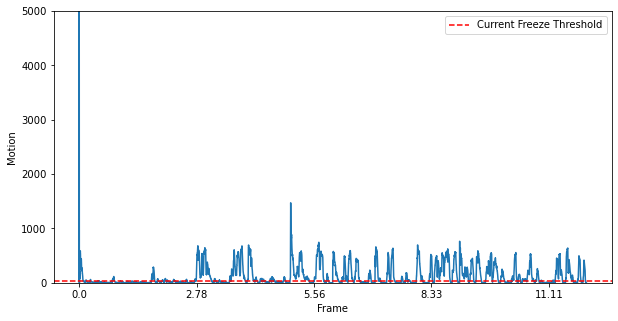

In [35]:
freeze_threshold = 30
detector.freeze_threshold = freeze_threshold
ax = detector.plot_motion()
ax.set_xticklabels(np.round(ax.get_xticks() / (30 * 60), 2))
ax.set_ylim([0, 5000])

In [36]:
detector.detect_freezes(freeze_threshold=freeze_threshold)
detector.save_video()

<FreezeDetector: B46837_1_15_2021_noon2_condition_two_video.avi>

In [37]:
(
    detector.generate_report()
    .assign(
        session_name=session_name,
        mouseID=mouseID 
    )
    .to_csv(
        Path(m.video_paths[session_name]["output_dir"]) / "freeze_ts.csv", 
        index=False
    )
)

## D3

In [38]:
session_name = "D3"

freeze_threshold = 700
start_frame=0

In [39]:
detector = FreezeDetector(
    video_path=m.video_paths[session_name]["input_dir"], 
    save_video_dir=m.video_paths[session_name]["output_dir"],
    freeze_threshold=freeze_threshold, 
    start_frame=start_frame,
    med_filter_size=5,
        compression_factor=3
)
detector.detect_motion()

array([171., 171., 171., ...,  87.,  80.,  79.])

C:\Users\rory\.conda\envs\context\lib\site-packages\ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


(0.0, 5000.0)

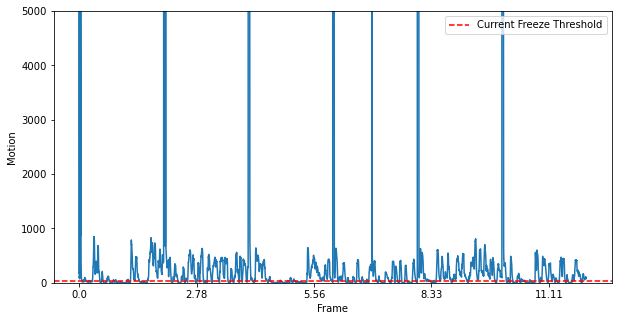

In [40]:
freeze_threshold = 30
detector.freeze_threshold = freeze_threshold
ax = detector.plot_motion()
ax.set_xticklabels(np.round(ax.get_xticks() / (30 * 60), 2))
ax.set_ylim([0, 5000])

In [41]:
detector.detect_freezes(freeze_threshold=freeze_threshold)
detector.save_video()

<FreezeDetector: B46837_1_16_2021_test1_context_switch_one_video.avi>

In [42]:
(
    detector.generate_report()
    .assign(
        session_name=session_name,
        mouseID=mouseID 
    )
    .to_csv(
        Path(m.video_paths[session_name]["output_dir"]) / "freeze_ts.csv", 
        index=False
    )
)

## D4

In [43]:
session_name = "D4"

freeze_threshold = 30
start_frame=0

In [44]:
detector = FreezeDetector(
    video_path=m.video_paths[session_name]["input_dir"], 
    save_video_dir=m.video_paths[session_name]["output_dir"],
    freeze_threshold=freeze_threshold, 
    start_frame=start_frame,
    med_filter_size=5
)
detector.detect_motion()

KeyboardInterrupt: 

In [ ]:
freeze_threshold = 30
detector.freeze_threshold = freeze_threshold
ax = detector.plot_motion()
ax.set_xticklabels(np.round(ax.get_xticks() / (30 * 60), 2))
ax.set_ylim([0, 4000])

In [ ]:
detector.detect_freezes(freeze_threshold=freeze_threshold)
detector.save_video()

In [ ]:
(
    detector.generate_report()
    .assign(
        session_name=session_name,
        mouseID=mouseID 
    )
    .to_csv(
        Path(m.video_paths[session_name]["output_dir"]) / "freeze_ts.csv", 
        index=False
    )
)